In [133]:
import pandas as pd
import json
import ast
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from joblib import dump, load
import os
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC
import pickle as pkl
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier



class append:
    def __init__(self,df2):

        self.df = df2 

    def name(self, data):

        t1 = ''
        for i in range(0,8):
            t1 += data[i]
        parts2 = t1.str.split(':')
        t2 = parts2.str[6]
        parts3 = t2.str.split('\'')
        name = parts3.str[1]
        return name
    

    def designation(self, data):

        specific = 'name_limited'
        contains_string = self.parts1.apply(lambda x: specific in x[4] if len(x) > 4 else False)

        if contains_string.any():
            name_limited = data[4]
            designation = data[5]
            nasa_jpl_url = data[6]
            abs_magnitude_h = data[7]
            diameter = ' '
            for i in range(8,16):
                diameter += data[i] + ','
            hazard = data[16]
        else:
            name_limited = ' '
            designation = data[4]
            nasa_jpl_url = data[5]
            abs_magnitude_h = data[6]
            diameter = ' '
            for i in range(7,15):
                diameter += data[i] + ','
            hazard = data[15]


        return name_limited, designation, nasa_jpl_url, abs_magnitude_h, diameter, hazard
    
    def orbit(self, data):

        orbit = ' '
        orbit = data[1]
        parts = orbit.str.split(',')
        orbit_data1 = ' '
        for i in range(1,26):
            orbit_data1 += parts.str[i].astype(str) + ','
        orbit_data1 = orbit_data1.str.rstrip(',')
        parts2 = orbit_data1.str.split(':')
        orbit_data = ' '
        for i in range(1,30):
            orbit_data += parts2.str[i].astype(str) + ':'
        orbit_data = orbit_data.str.rstrip(':')
        #orbit_data = orbit_data.apply(ast.literal_eval)

        is_sentry_object1 = ' '
        is_sentry_object1 = parts.str[26]
        parts1 = is_sentry_object1.str.split(':')
        is_sentry_object = parts1.str[1].astype(str)
        is_sentry_object = is_sentry_object.str.rstrip('}')
        is_sentry_object = is_sentry_object.str.lower() == 'true'
        is_sentry_object = is_sentry_object.astype(bool)

        return orbit_data, is_sentry_object

    def separation(self):
    

        # Assuming df2 is already defined
        df_result = pd.DataFrame()  # Initialize an empty DataFrame to store results

        for i in range(len(self.df)):
            df2t = self.df.iloc[[i]]  # Process each row
            df2t = pd.DataFrame(df2t)
            df2t['data'] = df2t['neo_data']
            df2t = df2t.drop(columns=['neo_data'])
            df2t = df2t.astype(str)

            parts = df2t['data'].str.split(' ')
            parts1 = df2t['data'].str.split(',')
            partsorbit = df2t['data'].str.split(']')
            self.parts1 = parts1
            name_limited, designation, nasa_jpl_url, abs_magnitude_h, diameter, hazard = self.designation(parts1.str)
            orbit_data, is_sentry_object = self.orbit(partsorbit.str)
            
            df2t['links'] = parts.str[1] + parts.str[2]
            df2t['id'] = parts.str[4]
            df2t['id'] = df2t['id'].str.replace('\'', '')
            df2t['id'] = df2t['id'].str.replace(',', '')
            df2t['id'] = df2t['id'].astype(int)


            df2t['neo_reference_id'] = parts.str[6]
            df2t['neo_reference_id'] = df2t['neo_reference_id'].str.replace('\'', '')
            df2t['neo_reference_id'] = df2t['neo_reference_id'].str.replace(',', '')
            df2t['neo_reference_id'] = df2t['neo_reference_id'].astype(int)


            df2t['name'] = self.name(parts1.str)


            df2t['name_limited'] = name_limited
            parts = df2t['name_limited'].str.split(' ')
            df2t['name_limited'] = parts.str[2]
            df2t['name_limited'] = df2t['name_limited'].astype(str)
            df2t['name_limited'] = df2t['name_limited'].str.replace('\'', '')


            df2t['designation'] = designation
            parts = df2t['designation'].str.split(' ')
            df2t['designation'] = parts.str[2]
            df2t['designation'] = df2t['designation'].astype(str)
            df2t['designation'] = df2t['designation'].str.replace('\'', '')


            df2t['nasa_jpl_url'] = nasa_jpl_url
            parts = df2t['nasa_jpl_url'].str.split(' ')
            df2t['nasa_jpl_url'] = parts.str[2]
            df2t['nasa_jpl_url'] = df2t['nasa_jpl_url'].astype(str)
            df2t['nasa_jpl_url'] = df2t['nasa_jpl_url'].str.replace('\'', '')


            df2t['absolute_magnitude_h'] = abs_magnitude_h
            parts = df2t['absolute_magnitude_h'].str.split(' ')
            df2t['absolute_magnitude_h'] = parts.str[2]
            df2t['absolute_magnitude_h'] = df2t['absolute_magnitude_h'].astype(str)
            df2t['absolute_magnitude_h'] = df2t['absolute_magnitude_h'].str.replace('\'', '')
            df2t['absolute_magnitude_h'] = df2t['absolute_magnitude_h'].astype(float)


            df2t['estiated_diameter1'] = diameter
            df2t['estiated_diameter1'] = df2t['estiated_diameter1'].str.rstrip(',')
            parts = df2t['estiated_diameter1'].str.split(' ')

            df2t['estimated_diameter'] = ' '
            for i in range(3,23):
                df2t['estimated_diameter'] += parts.str[i] + ' '
            df2t.drop(columns=['estiated_diameter1'], inplace=True)


            df2t['is_potentially_hazardous_asteroid'] = hazard
            parts = df2t['is_potentially_hazardous_asteroid'].str.split(' ')
            df2t['is_potentially_hazardous_asteroid'] = parts.str[2]
            df2t['is_potentially_hazardous_asteroid'] = df2t['is_potentially_hazardous_asteroid'].astype(str)
            df2t['is_potentially_hazardous_asteroid'] = df2t['is_potentially_hazardous_asteroid'].str.lower() == 'true'
            df2t['is_potentially_hazardous_asteroid'] = df2t['is_potentially_hazardous_asteroid'].astype(bool)

            parts1 = df2t['data'].str.split('[')
            df2t['approachdata'] = ' '
            df2t['approachdata'] = parts1.str[1]
            parts2 = df2t['approachdata'].str.split(']')
            df2t['close_approach_data'] = ' '
            df2t['close_approach_data'] = parts2.str[0]
            df2t['close_approach_data'] = df2t['close_approach_data'].apply(lambda x: f'[{x}]')
            df2t['close_approach_data'] = df2t['close_approach_data'].apply(ast.literal_eval)
            # df2t['close_approach_data'] = df2t['close_approach_data'].apply(lambda x: ' ' if x == [] else x)
            df2t = df2t[df2t['close_approach_data'].apply(lambda x: x != [])]

            df2t.drop(columns=['approachdata'], inplace=True)


            # df2t['close_approach_data'] = df2t['close_approach_data'].apply(ast.literal_eval)



            df2t['orbital_data'] = orbit_data


            df2t['is_sentry_object'] = is_sentry_object
            
                        


            df_result = pd.concat([df_result, df2t], ignore_index=True)  # Append to the result DataFrame

        df_result = df_result.drop(columns=['data'])
        df_result.dropna(subset=['close_approach_data'], inplace=True)
        self.df_result = df_result

        return self.df_result
    
    def concat(self):

        df_result = self.separation()

        df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/neo_data.csv')

        df = pd.concat([df, df_result], ignore_index=True)

        return df
    
class OverallProcessor:

    def __init__(self, df):
        self.df = df

    def explode(self):

        def explode_approach(self):
            self.df['close_approach_data'] = self.df['close_approach_data'].apply(ast.literal_eval)
            self.df = self.df.explode("close_approach_data").reset_index(drop=True)
            normalized_close_approach_data = pd.json_normalize(self.df['close_approach_data'])
            self.df = pd.concat([self.df.drop(columns=['close_approach_data']), normalized_close_approach_data], axis=1)
            
        
        def clean_diameter(self):
                self.df.drop(columns=['neo_reference_id', 'name_limited', 'links', 'nasa_jpl_url'], inplace=True)
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('\'', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('{', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('}', '')
                parts = self.df['estimated_diameter'].str.split(',')
                self.df['estimated_diameter'] = parts.str[0] + parts.str[1]
                parts = self.df['estimated_diameter'].str.split(':')
                self.df['estimated_diameter'] = parts.str[1] + parts.str[2] + parts.str[3] 
                parts = self.df['estimated_diameter'].str.split(' ')
                self.df['estimated_diameter_min'] = parts.str[2]
                self.df['estimated_diameter_max'] = parts.str[4]
                self.df.drop(columns=['estimated_diameter'], inplace=True)


        def clean_orbits(self):
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('\'', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('{', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('}', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace(']', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('[', '')
            parts = self.df['orbital_data'].str.split(',')
            self.df['extracted_orbital_data'] = parts.str[7]+parts.str[10]+parts.str[12]+parts.str[15]+parts.str[17]
            parts = self.df['extracted_orbital_data'].str.split(' ')
            self.df['minimum_orbit_intersection'] = parts.str[2]
            self.df['eccentricity'] = parts.str[4]
            self.df['inclination'] = parts.str[6]
            self.df['perihilion_distance'] = parts.str[8]
            self.df['aphelion_distance'] = parts.str[10]
            self.df.drop(columns=['orbital_data', 'extracted_orbital_data'], inplace=True)    

        explode_approach(self)
        clean_diameter(self)
        clean_orbits(self)
        return self.df
    
    def clean(self):

        def explode_approach(self):
            self.df['close_approach_data'] = self.df['close_approach_data'].apply(ast.literal_eval)
            self.df = self.df.explode("close_approach_data").reset_index(drop=True)
            normalized_close_approach_data = pd.json_normalize(self.df['close_approach_data'])
            self.df = pd.concat([self.df.drop(columns=['close_approach_data']), normalized_close_approach_data], axis=1)
            
        
        def clean_diameter(self):
                self.df.drop(columns=['neo_reference_id', 'name_limited', 'links', 'nasa_jpl_url'], inplace=True)
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('\'', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('{', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('}', '')
                parts = self.df['estimated_diameter'].str.split(',')
                self.df['estimated_diameter'] = parts.str[0] + parts.str[1]
                parts = self.df['estimated_diameter'].str.split(':')
                self.df['estimated_diameter'] = parts.str[1] + parts.str[2] + parts.str[3] 
                parts = self.df['estimated_diameter'].str.split(' ')
                self.df['estimated_diameter_min'] = parts.str[2]
                self.df['estimated_diameter_max'] = parts.str[4]
                self.df.drop(columns=['estimated_diameter'], inplace=True)


        def clean_orbits(self):
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('\'', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('{', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('}', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace(']', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('[', '')
            parts = self.df['orbital_data'].str.split(',')
            self.df['extracted_orbital_data'] = parts.str[7]+parts.str[10]+parts.str[12]+parts.str[15]+parts.str[17]
            parts = self.df['extracted_orbital_data'].str.split(' ')
            self.df['minimum_orbit_intersection'] = parts.str[2]
            self.df['eccentricity'] = parts.str[4]
            self.df['inclination'] = parts.str[6]
            self.df['perihilion_distance'] = parts.str[8]
            self.df['aphelion_distance'] = parts.str[10]
            self.df.drop(columns=['orbital_data', 'extracted_orbital_data'], inplace=True)   


        def clean_df(self):
            self.df.drop(columns=['id', 'name', 'designation', 'is_sentry_object', 'close_approach_date', 'close_approach_date_full', 'epoch_date_close_approach', 'orbiting_body', 'relative_velocity.kilometers_per_second', 'relative_velocity.miles_per_hour', 'miss_distance.astronomical', 'miss_distance.lunar', 'miss_distance.miles' ], inplace=True)
            self.df = self.df.rename(columns={'is_potentially_hazardous_asteroid': 'is_hazardous'}) 
            estimated_diameter_average = (self.df['estimated_diameter_min'].astype(float) + self.df['estimated_diameter_max'].astype(float)) / 2
            self.df['estimated_diameter_average'] = estimated_diameter_average

        def encoder(self):
            le = LabelEncoder()
            self.df['is_hazardous'] = le.fit_transform(self.df['is_hazardous'])

        explode_approach(self)
        clean_diameter(self)
        clean_orbits(self)
        clean_df(self)
        encoder(self)
        return self.df  
    
    def smote(self):
             
        self.df_test = self.df.copy()

        sm = SMOTE(sampling_strategy='minority', random_state=42)
        oversampled_X, oversampled_Y = sm.fit_resample(self.df_test.drop('is_hazardous', axis=1), self.df_test['is_hazardous'])
        self.df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
        return self.df
    
    def adasyn(self):
        self.df_test = self.df.copy()

        ada = ADASYN(sampling_strategy='minority', random_state=42)
        oversampled_X, oversampled_Y = ada.fit_resample(self.df_test.drop('is_hazardous', axis=1), self.df_test['is_hazardous'])
        self.df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
        return self.df
    
    def rus(self):
        self.df_test = self.df.copy()

        X = self.df_test.drop(columns=['is_hazardous'])
        y = self.df_test['is_hazardous']

        rus = RandomUnderSampler(random_state=42)
        X_resampled, y_resampled = rus.fit_resample(X,y)
        self.df = pd.concat([pd.DataFrame(y_resampled), pd.DataFrame(X_resampled)], axis=1)
        self.df.reset_index(drop=True, inplace=True)
        return self.df
    

class scalesplit:
    def __init__(self, df):
        self.df = df

    def ssplit(self):

        def split(self):

         X = self.df.drop(columns=['is_hazardous'])
         y = self.df['is_hazardous']


         split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

         for train_index, test_index in split.split(X, y):
          self.X_train, self.X_test = X.loc[train_index], X.loc[test_index]
          self.y_train, self.y_test = y.loc[train_index], y.loc[test_index]

         

        def scale(self):
         
            self.X_train = StandardScaler().fit_transform(self.X_train)
            self.X_test = StandardScaler().fit_transform(self.X_test)

    
        split(self)
        scale(self)

        X_train = self.X_train
        X_test = self.X_test
        y_train = self.y_train
        y_test = self.y_test

        return X_train, X_test, y_train, y_test

class LogRegression:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def fit(self):

            def gridsearch():
#                 logReg = LogisticRegression()

#                 param_grid = {'solver': ['liblinear', 'newton-cholesky'],
#               'penalty':['none', 'l2'],
#               'C':[0.001, 0.01, 0.1, 1, 10, 100],
#               'n_jobs': [8],
#               'random_state': [0, 42, 32],
#               'fit_intercept': [True, False],
#               'warm_start': [True, False]
# }


#                 grid_search = GridSearchCV(logReg, param_grid, cv=5, verbose=0, n_jobs=-1)
#                 grid_search.fit(self.X_train, self.y_train)


                self.best_estimator_ = LogisticRegression(C=0.001, fit_intercept=False, n_jobs=8, random_state=0,solver='liblinear', warm_start=True) 


                # print(f'Best parameters: {grid_search.best_params_}')
                # print(f'Best Score: {grid_search.best_score_}')
                # print(f'Best Estimator: {grid_search.best_estimator_} ')

            def Regression(self):

                best_model = self.best_estimator_
                best_model.fit(self.X_train, self.y_train)

                prediction = best_model.predict(self.X_test)

                accuracy = accuracy_score(self.y_test, prediction)
                recall = recall_score(prediction, self.y_test)
                f1 = f1_score(prediction, self.y_test)
                roc = roc_auc_score(self.y_test, prediction)

                print (f'The accuracy score is {accuracy}, The recall score is {recall}, The f1 score is {f1}, The roc score is {roc}')

                print(f'Classification Report: \n {classification_report(self.y_test, prediction)}')

                cm = confusion_matrix(self.y_test, prediction)
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot(cmap='Blues')
                plt.show()

                cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

                sns.heatmap(cm2, annot=True, cmap='Blues')
                
            gridsearch()
            Regression(self)

class supportvm:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def fit(self):

        svm = SVC(C=10000, random_state=42)
        svm.fit(self.X_train, self.y_train)

        prediction = svm.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}, The recall score is {recall}, The f1 score is {f1}, The roc score is {roc}')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

class RandomForest:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def fit(self):

        randomforest = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=42, warm_start=True)
        randomforest.fit(self.X_train, self.y_train)

        prediction = randomforest.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}, The recall score is {recall}, The f1 score is {f1}, The roc score is {roc}')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

        
    


In [134]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/neo_data_copy.csv') 
df.head()

,links,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,orbital_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000433.0,2000433.0,433 Eros (A898 PA),Eros,433,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,10.41,{'kilometers': {'estimated_diameter_min': 22.0...,False,"[{'close_approach_date': '1900-12-27', 'close_...","{'orbit_id': '659', 'orbit_determination_date'...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000719.0,2000719.0,719 Albert (A911 TB),Albert,719,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,15.59,{'kilometers': {'estimated_diameter_min': 2.02...,False,"[{'close_approach_date': '1909-08-21', 'close_...","{'orbit_id': '266', 'orbit_determination_date'...",False
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000887.0,2000887.0,887 Alinda (A918 AA),Alinda,887,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,13.88,{'kilometers': {'estimated_diameter_min': 4.45...,False,"[{'close_approach_date': '1910-01-04', 'close_...","{'orbit_id': '488', 'orbit_determination_date'...",False
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2001036.0,2001036.0,1036 Ganymed (A924 UB),Ganymed,1036,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,9.25,{'kilometers': {'estimated_diameter_min': 37.5...,False,"[{'close_approach_date': '1910-02-25', 'close_...","{'orbit_id': '1240', 'orbit_determination_date...",False
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2001221.0,2001221.0,1221 Amor (1932 EA1),Amor,1221,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.38,{'kilometers': {'estimated_diameter_min': 0.88...,False,"[{'close_approach_date': '1900-03-08', 'close_...","{'orbit_id': '121', 'orbit_determination_date'...",False


In [135]:
df = OverallProcessor(df).clean()
df.head()

,absolute_magnitude_h,is_hazardous,relative_velocity.kilometers_per_hour,miss_distance.kilometers,estimated_diameter_min,estimated_diameter_max,minimum_orbit_intersection,eccentricity,inclination,perihilion_distance,aphelion_distance,estimated_diameter_average
0,10.41,0,20083.0290749201,47112732.928149391,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
1,10.41,0,15820.1671985367,70533232.893794475,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
2,10.41,0,17340.4224662258,74687814.59975122,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
3,10.41,0,16545.797587763,53823292.394218643,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593
4,10.41,0,21314.9467227704,26040971.835879446,22.0067027115,49.2084832235,.15023,.2226906033843441,10.8277255953075,1.133458052992745,1.782904615277399,35.607593


In [136]:
df = OverallProcessor(df).rus()
df.shape

(25096, 12)

In [137]:
df.head()

,is_hazardous,absolute_magnitude_h,relative_velocity.kilometers_per_hour,miss_distance.kilometers,estimated_diameter_min,estimated_diameter_max,minimum_orbit_intersection,eccentricity,inclination,perihilion_distance,aphelion_distance,estimated_diameter_average
0,0,26.91,28183.2262176706,1338996.724016161,0.0110294785,0.0246626636,.0100867,.5093918188251251,6.686945229315917,1.00695389636977,3.097967036495173,0.017846
1,0,25.82,32738.0262647721,22194554.396867284,0.0182202771,0.0407417781,.00191261,.4471360918826375,2.25555797238334,.7994938019484333,2.09269644671839,0.029481
2,0,28.44,28749.3011604989,15141658.306645302,0.0054519891,0.0121910182,.00615653,.1503100108365986,7.286439038203393,.8958248578140404,1.212767379917425,0.008822
3,0,23.26,23279.7304638839,65208239.205723247,0.0592318063,0.1324463452,.187817,.1053109129514385,5.624948555654733,1.194911310209714,1.476209479139664,0.095839
4,0,23.14,81474.3102856586,63946287.135052165,0.06259721,0.1399716167,.0833177,.6079174062746781,8.093767023513729,1.014742355180899,4.161423949675719,0.101284


In [4]:
df = OverallProcessor(df).smote()
df.shape

(275832, 12)

In [138]:
scsplit = scalesplit(df)
X_train, X_test, y_train, y_test = scsplit.ssplit()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20076, 11), (5020, 11), (20076,), (5020,))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


The accuracy score is 0.94601593625498, The recall score is 0.9025530384753686, The f1 score is 0.9487809487809488, The roc score is 0.9460159362549801
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94      2510
           1       0.90      1.00      0.95      2510

    accuracy                           0.95      5020
   macro avg       0.95      0.95      0.95      5020
weighted avg       0.95      0.95      0.95      5020



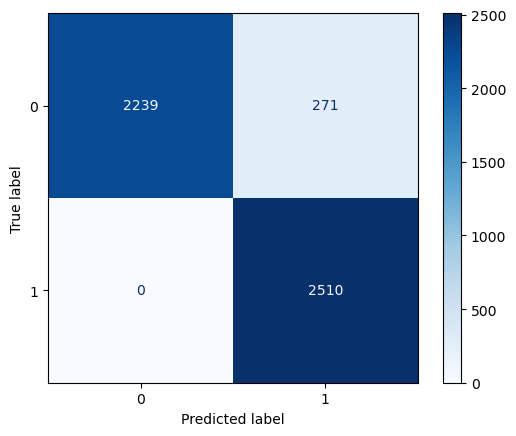

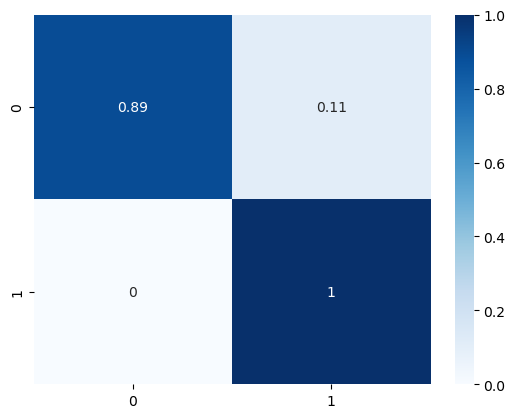

In [139]:
log_reg = LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.998207171314741, The recall score is 0.9972166998011929, The f1 score is 0.9982089552238806, The roc score is 0.998207171314741
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2510
           1       1.00      1.00      1.00      2510

    accuracy                           1.00      5020
   macro avg       1.00      1.00      1.00      5020
weighted avg       1.00      1.00      1.00      5020



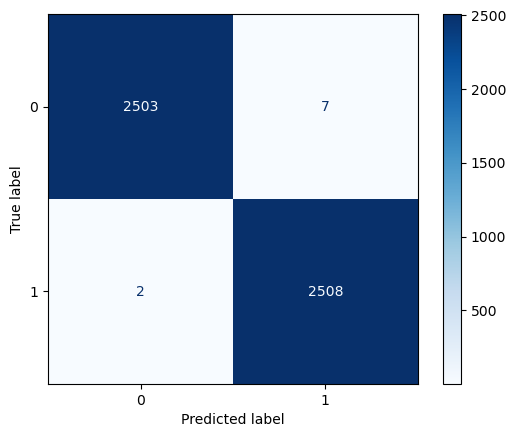

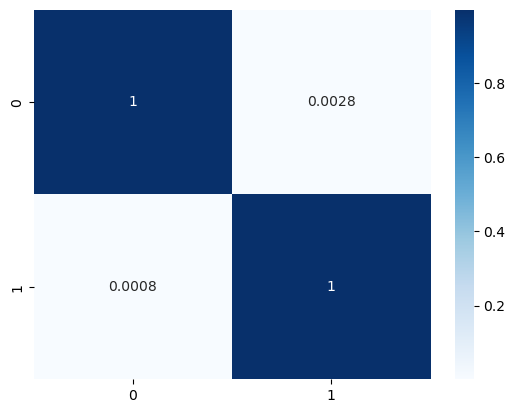

In [140]:
suportvm = supportvm(X_train, X_test, y_train, y_test)
suportvm.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


The accuracy score is 0.9292828685258964, The recall score is 1.0, The f1 score is 0.9239013933547695, The roc score is 0.9292828685258965
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      2510
           1       1.00      0.86      0.92      2510

    accuracy                           0.93      5020
   macro avg       0.94      0.93      0.93      5020
weighted avg       0.94      0.93      0.93      5020



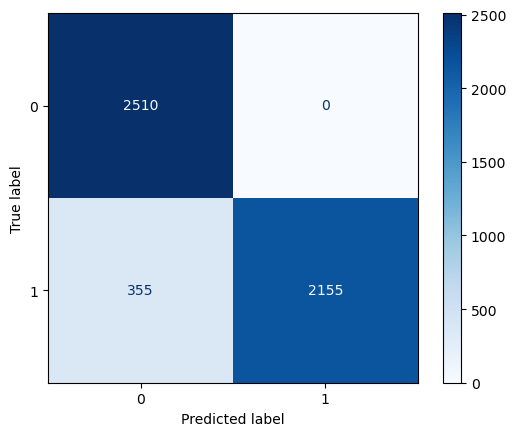

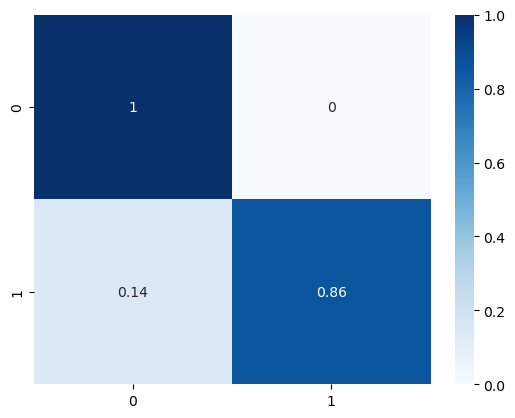

In [141]:
ranfr = RandomForest(X_train, X_test, y_train, y_test)
ranfr.fit()